In [1]:
import skimage.io as io
import skimage as sk
from skimage.color import rgb2gray
from skimage.transform import resize
import time
import numpy as np
import os


from unitTesting import UnitTest
import adaboost.adaboost as ab

# Testing

In [2]:
img = io.imread('./test.jpg')
img = rgb2gray(img)
ut = UnitTest(img)

#load positive dataset
try:
    print("Loading positive dataset...")
    positiveDataset = np.load("./Dataset/positiveDataset.npy")
except:
    print("No dataset found, creating new dataset...")
    positiveDataset = np.load("./Dataset/olivetti_faces.npy")
    personID = np.load("./Dataset/olivetti_faces_target.npy")


    #resize images to 24x24
    newPositiveDataset = np.empty(shape=(positiveDataset.shape[0], 24, 24))
    for i in range(len(positiveDataset)):
        newImg = np.array(positiveDataset[i])
        
        finalImg = resize(newImg, (24, 24))
        newPositiveDataset[i] = finalImg

    positiveDataset = newPositiveDataset

    # for i in range(10):
    #     io.imshow(positiveDataset[i])
    #     io.show()

    # print(positiveDataset.shape)

    

    np.save("./Dataset/positiveDataset.npy", positiveDataset)

#loading negative dataset
try:
    print("Loading negative dataset...")
    negativeDataset = np.load("./Dataset/negativeDataset.npy")
except:
    print("No dataset found, creating new dataset...")
    directory = "./Dataset/NegativeSet"
    negativeDataset = np.empty(shape=(len(os.listdir(directory)), 24, 24))
    i = 0
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            curImg = io.imread(os.path.join(directory, filename), as_gray=True)
            newImg = resize(curImg, (24, 24))
            negativeDataset[i] = newImg
            i += 1
    # negativeDataset = negativeDataset.reshape(len(os.listdir(directory)), 64, 64)
    # print(negativeDataset.shape)
    np.save("./Dataset/negativeDataset.npy", negativeDataset)



posDataset, negDataset = ab.preprocessImages(positiveDataset, negativeDataset)
print(f"Positive Dataset Shape: {posDataset.shape}")
print(f"Negative Dataset Shape: {negDataset.shape}")



Integral image test PASSED
Determine features test PASSED
Loading positive dataset...
Loading negative dataset...
Positive Dataset Shape: (400, 24, 24)
Negative Dataset Shape: (59, 24, 24)


Loading classifiers...
Classifiers loaded successfully


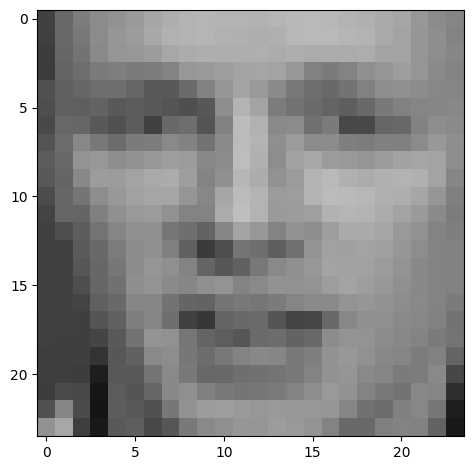

In [10]:
classifiersToBeUsed = []
try :
    print("Loading classifiers...")
    classifiersToBeUsed = np.load("./classifiers.npy", allow_pickle=True)
except Exception as e:
    print(e)
    print("No classifiers found, creating new classifiers...")
    classifier = ab.AdaBoost()
    nClassifiers = 50
    start = time.time()
    classifiersToBeUsed = classifier.learn(posDataset, negDataset,0.3,24,24, nClassifiers)
    end = time.time()
    classifiersToBeUsed = np.array(classifiersToBeUsed)
    np.save("./classifiers.npy", classifiersToBeUsed)
    print("Time taken to train the classifier: ", end-start)

print("Classifiers loaded successfully")

testDataSet = np.load("./Dataset/testFaces.npy")
testDataSetTarget = np.load("./Dataset/testTargets.npy")




